# 共通データ

時系列データなら何でもよいので、下記のデータを利用した  
`pl.read_csv()` はURLから直接CSVデータをダウンロードできる

https://www.mhlw.go.jp/stf/covid-19/open-data.html

47都道府県ではデータが多すぎて見づらいので、東京・大阪・名古屋のみにする

In [1]:
import polars as pl

In [2]:
url = "https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv"
data = pl.read_csv(url)
# data = data.melt(id_vars="Date") #pandas と同じ melt でも動くけど deprecated
data = data.unpivot(index=["Date"])
data.columns = ["Date", "Prefecture", "Newly confirmed cases"]
data = data.filter(pl.col("Prefecture").is_in(['Tokyo','Osaka','Aichi']))
# polars は何でも str になるので cast が必要
data = data.with_columns(pl.col("Newly confirmed cases").cast(pl.Int64))
data = data.with_columns(pl.col("Date").str.to_date("%Y/%m/%d"))
data[200:210]

Date,Prefecture,Newly confirmed cases
date,str,i64
2020-08-03,"""Tokyo""",258
2020-08-04,"""Tokyo""",309
2020-08-05,"""Tokyo""",263
2020-08-06,"""Tokyo""",360
2020-08-07,"""Tokyo""",461
2020-08-08,"""Tokyo""",429
2020-08-09,"""Tokyo""",331
2020-08-10,"""Tokyo""",197
2020-08-11,"""Tokyo""",188


In [3]:
data_yoko = data.pivot(index="Date",
                       on="Prefecture",
                       values="Newly confirmed cases")

# # Pandas と同じ書式でも動くけど deprecated
# data_yoko = data.pivot(index="Date",
#                        column="Prefecture",
#                        values="Newly confirmed cases")

data_yoko

Date,Tokyo,Aichi,Osaka
date,i64,i64,i64
2020-01-16,0,0,0
2020-01-17,0,0,0
2020-01-18,0,0,0
2020-01-19,0,0,0
2020-01-20,0,0,0
…,…,…,…
2023-05-04,994,221,499
2023-05-05,906,252,440
2023-05-06,1062,282,430


## 高水準作図ライブラリ

## Seaborn

Seaborn は matplotlib のラッパー。データフレームからシンプルな関数で様々なグラフを描画できる

色遣いがきれいで、デフォルトでもカッコよいグラフが描けるのが特徴。  
グラフごとに微妙に作法が違っていたりして、使い込むとやや洗練されていない印象を受ける。  
足りない部分は matplotlib で調整できる/する必要があるのが、長所でもあり短所でもある。  
また、デフォルトでは日本語が文字化けするのが面倒。  

https://seaborn.pydata.org/

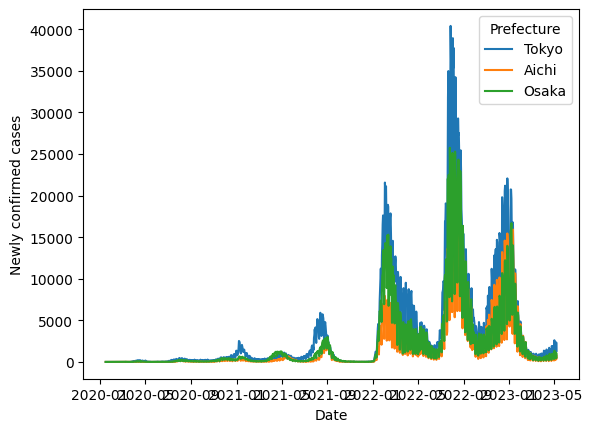

In [4]:
# minimum
import seaborn as sns
ax = sns.lineplot(data=data,
             x="Date",
             y="Newly confirmed cases",
             hue="Prefecture")

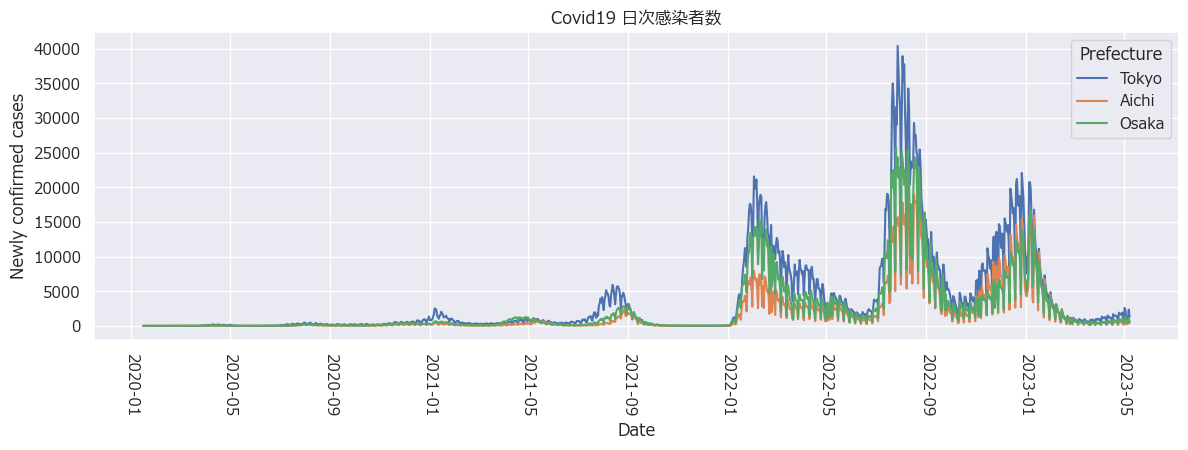

In [5]:
#practical
import seaborn as sns
import matplotlib.pyplot as plt
# 日本語文字化け対応でフォントを指定する。matplotlib に比べれば楽。
sns.set(font='Meiryo')
# 画像サイズを設定する程度の事で matplotlib を呼ぶのが面倒
# グラフ描画より前に画像サイズを設定する必要があるなど、matplotlib のお作法に縛られる
plt.figure(figsize=[14,4]) 
# グラフ描画の関数はシンプルでとっつきやすい
ax = sns.lineplot(data=data,
             x="Date",
             y="Newly confirmed cases",
             hue="Prefecture")
ax.set_title("Covid19 日次感染者数")
plt.xticks(rotation=-90)
plt.show()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Seaborn Object

2022年に導入された Seaborn のグラフィック指向インターフェイス。  
ざっくり言って、Seaborn で ggplot/plotnine 的な書き方ができるようになる。

- [The seaborn.objects interface](https://seaborn.pydata.org/tutorial/objects_interface.html)
  - [plot](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html)
  - [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
  - [layout](https://seaborn.pydata.org/generated/seaborn.objects.Plot.layout.html)
  - [label](https://seaborn.pydata.org/generated/seaborn.objects.Plot.label.html#seaborn-objects-plot-label)
- [Seaborn Objects ~ グラフィックの文法で強化された Python 可視化ライブラリの新形態 ~](https://recruit.gmo.jp/engineer/jisedai/blog/seaborn-objects/)
- [Seabornのオブジェクト・インターフェイスのガイド](https://qiita.com/nkay/items/ab5beea96e8648aeab63)

#### minimum
`seaborn` に含まれているので、新たに別ライブラリをインストールしないで済むのは嬉しい  
ワンライナーだとかえって複雑に見えて有難味が分からないが……


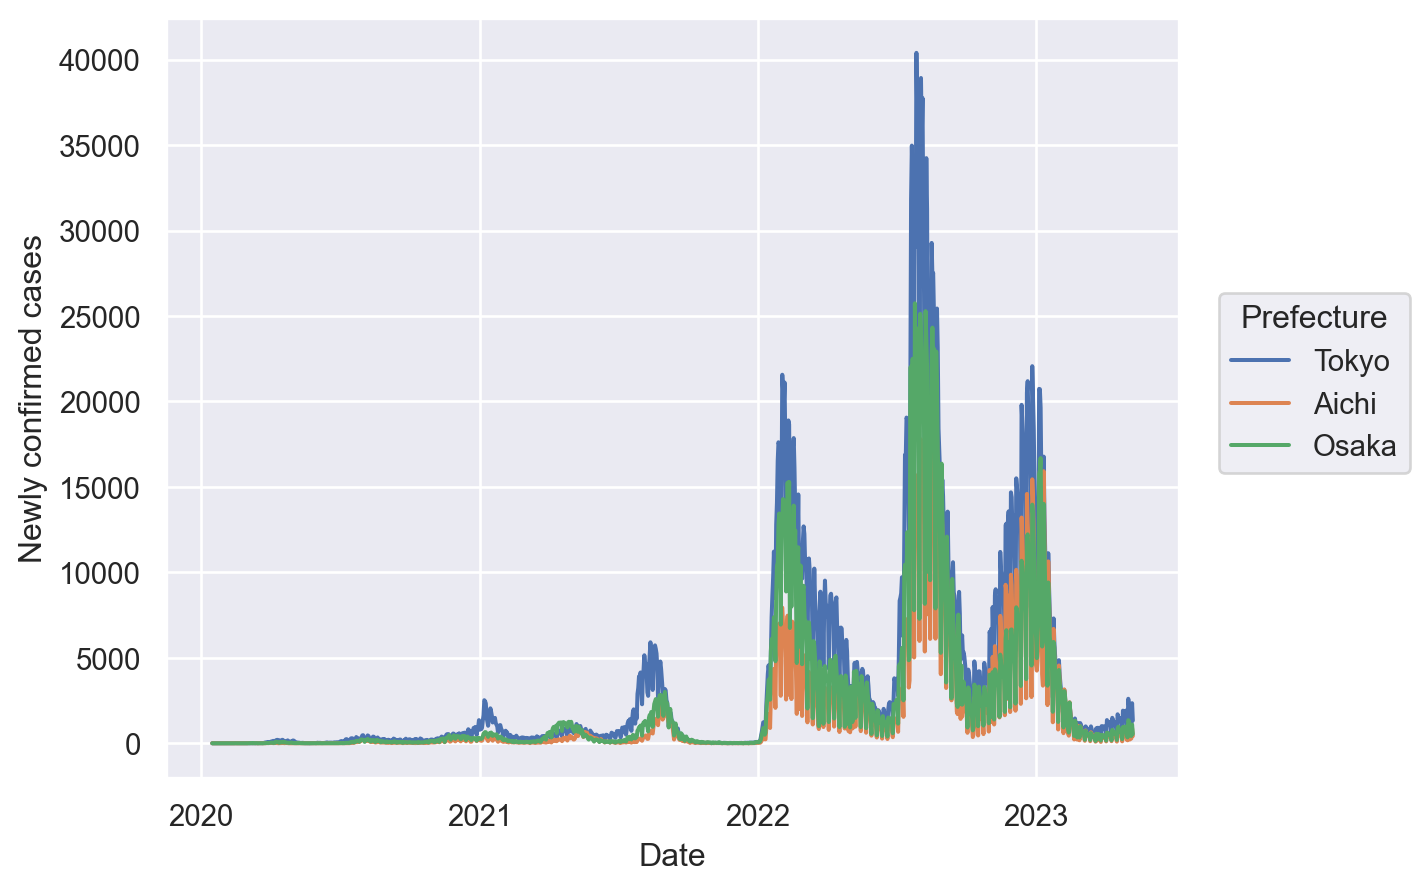

In [6]:
#minimum
import seaborn.objects as so
so.Plot(data, x="Date", y="Newly confirmed cases", color="Prefecture").add(so.Line())

#### Practical

実務的な設定をしようと思うと見通しが格段に良くなって有難味が分かる。

- pros
  - 関数呼び出しのカッコごとに改行してメソッドチェーンすると読みやすい。   
  - グラフサイズが Seaborn 内で設定できるようになったのが嬉しい（元々できてろよという気もするが…） 
- cons
  - 依然としてデフォルトでは日本語非対応 
  - 日本語フォントの設定は matplotlib の rc 設定を弄っており、おまじないレベルだがちょっと面倒くさい。

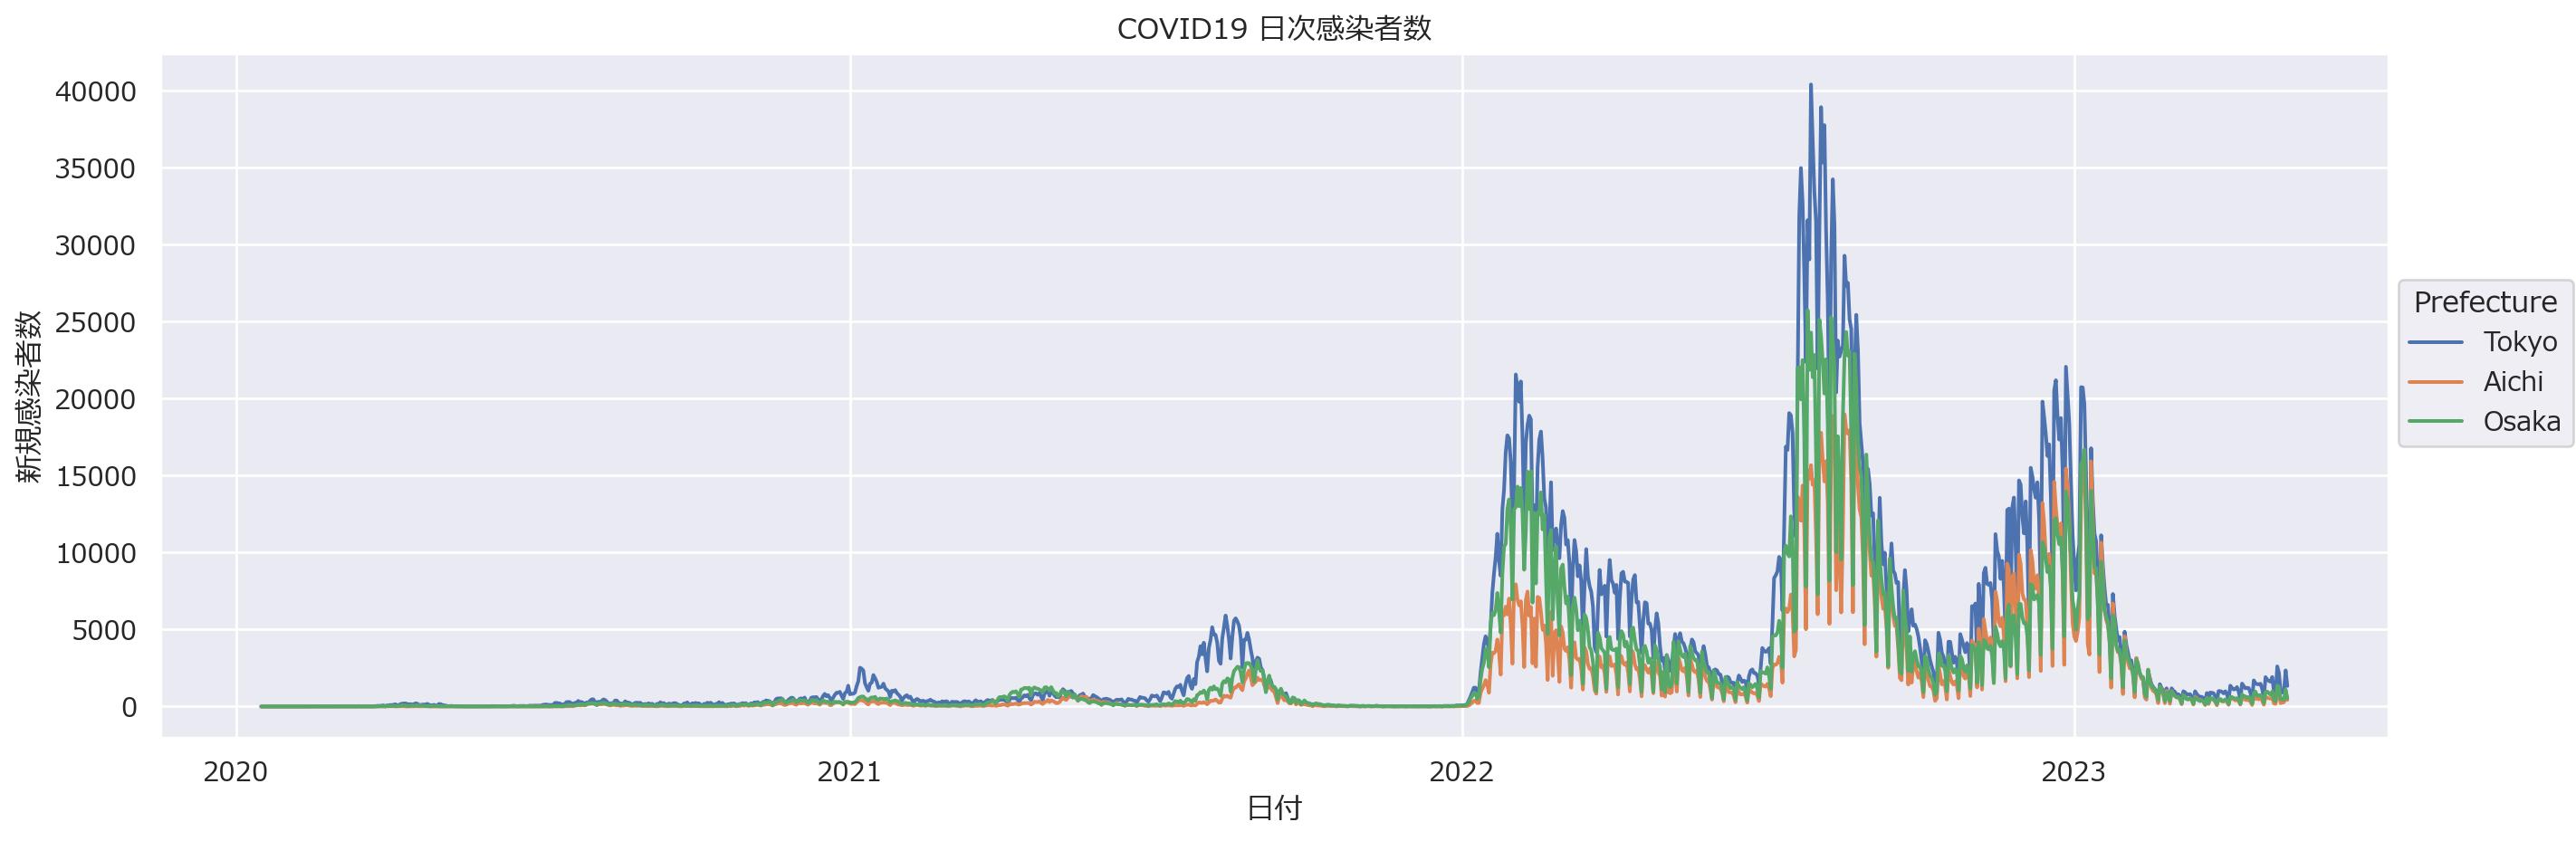

In [7]:
import seaborn.objects as so
so.Plot(
    data, x="Date", y="Newly confirmed cases", color="Prefecture",
).add(
    so.Line()
).layout(
    size=(14,5)
).label(
    title="COVID19 日次感染者数",
    x="日付",
    y="新規感染者数"
).theme(
    {"font.family":"Meiryo"}
)

## plotnine

plotnine は R のグラフ描画パッケージである ggplot2 をほぼ完璧に python に移植した matplotlib のラッパー。  
文法が ggplot2 なので、最初はとっつきにくいが、完全に構造化されていて慣れると覚えやすい（はず）

オブジェクトに `+=` で指示を追加していくので、指示が長くなっても見通しが良い。

### 公式ドキュメント類

* https://plotnine.readthedocs.io/en/stable/index.html

### 参考サイト

* https://ill-identified.hatenablog.com/entry/2021/08/06/200859
* [plotnine example](https://endogi.info/plotnine-example.html)

#### minimum
最小構成ではやはり有難味が分かりにくい

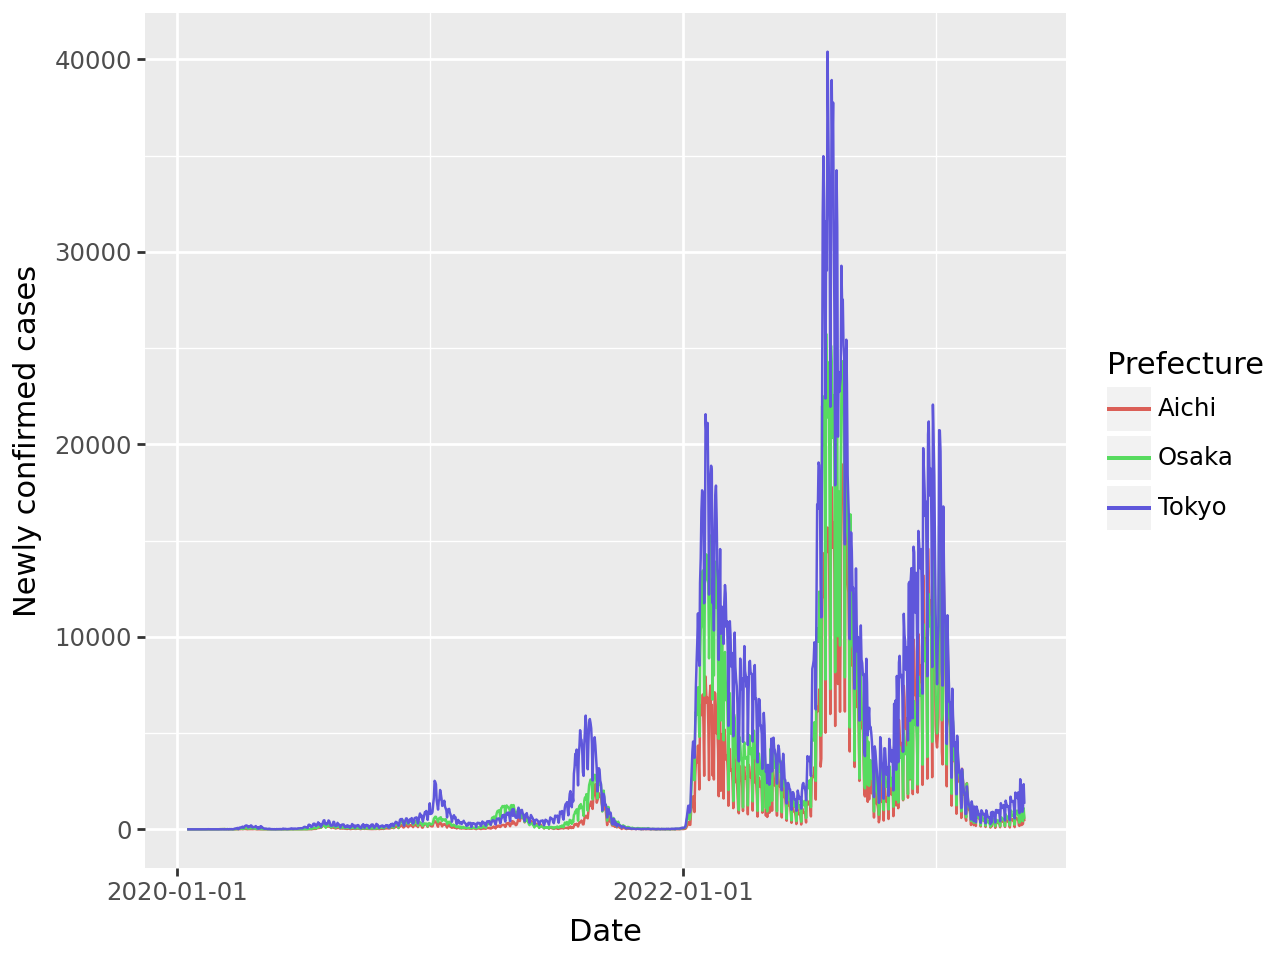

In [8]:
from plotnine import *
# データとプロット対象を指定
g = ggplot(data, aes(x="Date", y="Newly confirmed cases", color="Prefecture"))
# グラフの種類を指定
g += geom_line()
g

#### Practical

実務的にはこれくらいのコードになる

- [日付の目盛設定](https://plotnine.org/tutorials/miscellaneous-manipulating-date-breaks-and-date-labels.html)
  - [別ライブラリ (mizani) のインストールが必要で少々面倒](https://mizani.readthedocs.io/en/stable/)
  
- Pros
  - 後から要素を次々につなげていくことで
- Cons
  - パラメータの書き方がかなり癖があって調べながら出ないとよくわからない
  - plotnine をワイルドカードインポートするのがR風

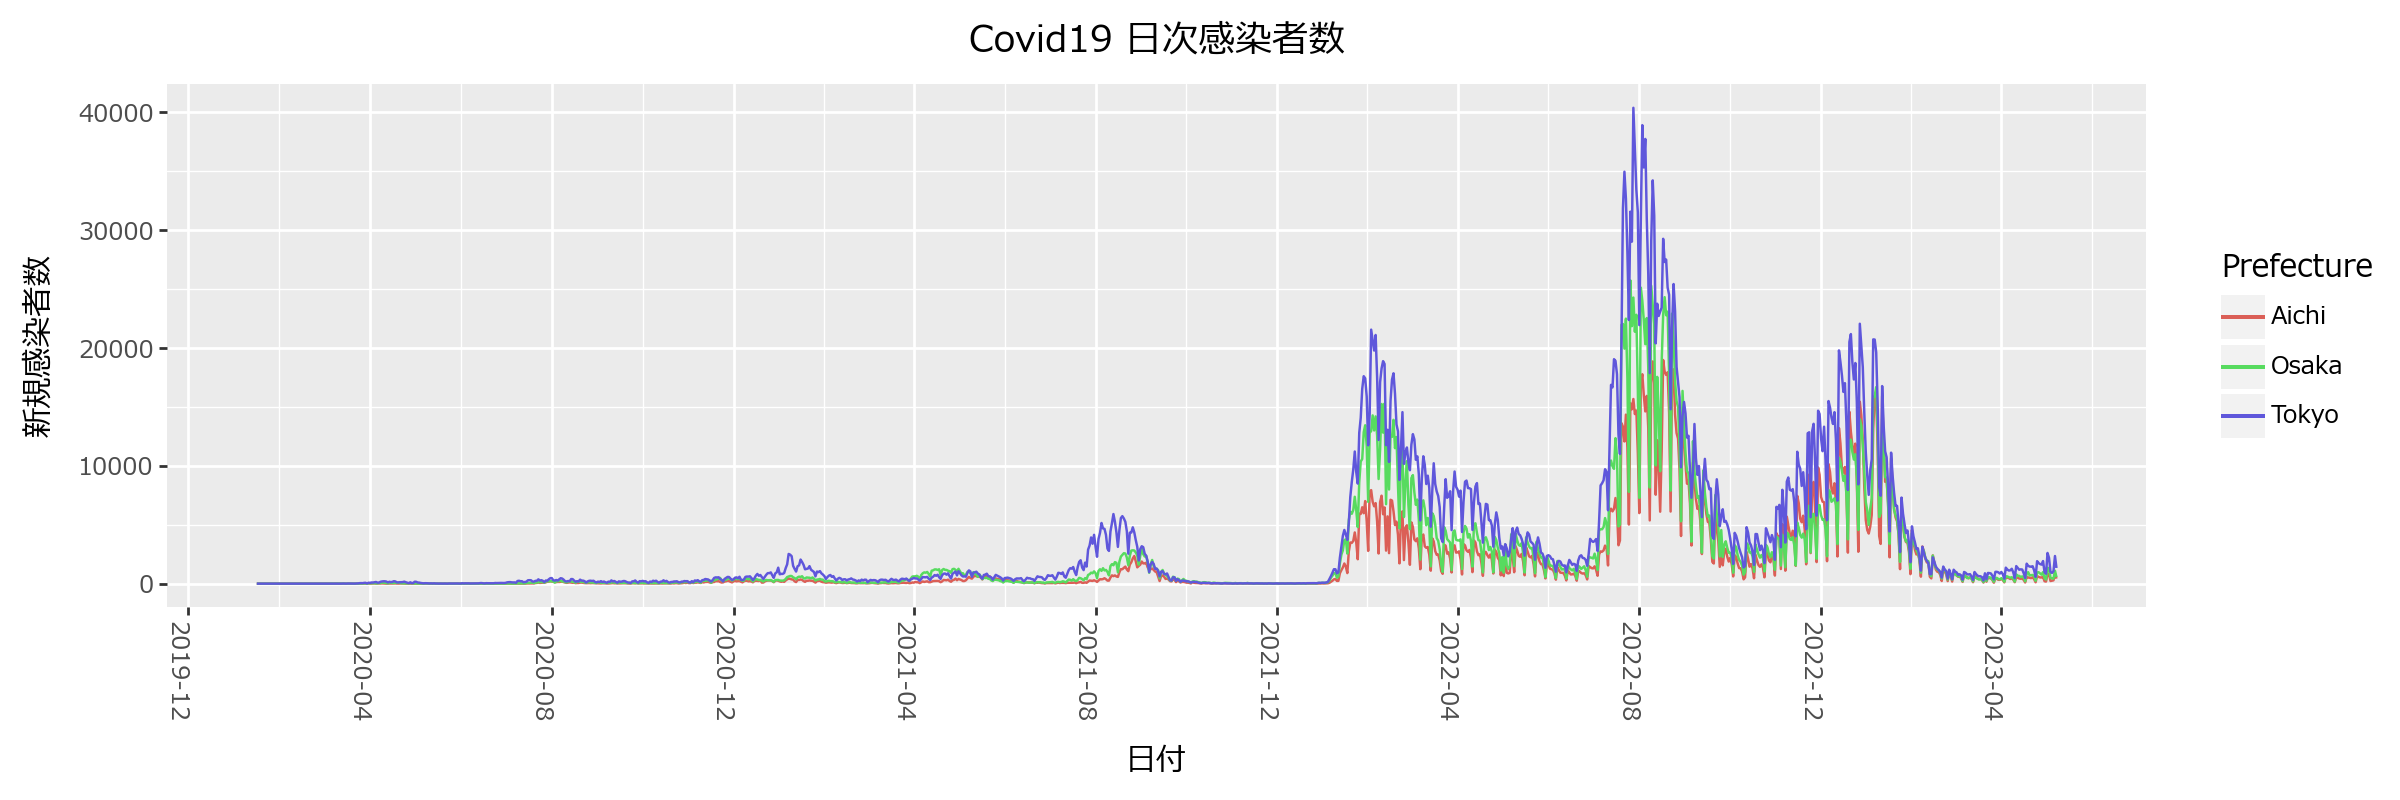

In [9]:
#practical
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format

# データとプロット対象を指定
g = ggplot(data, aes(x="Date", y='Newly confirmed cases', color="Prefecture"))
# グラフの種類を指定
g += geom_line()
# 見た目の調整を指定
g += theme(figure_size=(12, 4), text=element_text(family='Meiryo'))
g += theme(axis_text_x=element_text(rotation=-90, hjust=1))
g += labs(x='日付', y="新規感染者数", title="Covid19 日次感染者数")
g += scale_x_datetime(breaks=date_breaks("4 month"), labels=date_format("%Y-%m"))
g #描画

## Pandas 

Pandas にも matplotlib を利用した作図関数があり、単純なプロットなら Pandas だけで描画できる。  
ほかのライブラリをインストールするのが難しい時などに使えそう。

高水準作図ライブラリは縦持ちデータをそのまま処理できるのが普通だが、Pandasは横持データしか処理できないようだ（詳しくは未調査）

こいつのおかげで「Pandasしか必要ないのに matplotlib がインストールされた？」という事になる。

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

#### minimum

In [10]:
#minimum
data_yoko.plot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Practical

実用的にはサイズを指定するくらいがせいぜいか？

In [11]:
#practical
data_yoko.plot.line(figsize=(14,4))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Plotly Express

Plotly Express は Ploty をバックエンドにした高水準作図ライブラリ。  
Ploty をインストールすると一緒にインストールされる。  
関数はシンプルでわかりやすい。表示されるグラフは javascript でインタラクティブに操作できる。

Seaborn/matplotlib の様に PlotlyExpress も plotly の関数を使って細かい調整などもできるようである。

### 公式ドキュメント

* https://plotly.com/python/plotly-express/

### 参考サイト

* https://qiita.com/hanon/items/d8cbe25aa8f3a9347b0b

#### minimum
最低限構成で描画してもかなりサマになる。横幅を目いっぱい使うのがPlotly流。

In [12]:
import plotly.express as px
fig = px.line(data,
              x = "Date",
              y = "Newly confirmed cases",
              color= "Prefecture",
             )
fig.show()

#### Practical
Plotlyは日本語がそのまま通るのが美点

In [13]:
import plotly.express as px
fig = px.line(data,
              x = "Date",
              y = "Newly confirmed cases",
              color= "Prefecture",
              hover_name = "Prefecture",
              title = "Covid19 日次感染者数", 
              width = 1200,
              height = 450,
             )
fig.show()

## Altair

Altair（アルタイル） は javascript の作図ライブラリ Vega をバックエンドとした宣言型統計可視化ライブラリ

よく調査できていないが、宣言型という事で系統だったインターフェースが期待できる  
メソッドチェーンで指示を記載していくので、コマンドが横長に広がるのがやや難に感じられる   
描画されるグラフは matplot 系や plotly 系ともちょっと違ったカッコよさがあり、新鮮  

### 公式ドキュメント

* https://altair-viz.github.io/
* https://altair-viz.github.io/user_guide/times_and_dates.html

### 参考サイト

* https://yuunagi.hatenablog.com/entry/2019/04/07/231734
* [How to Create Interactive Plots with Altair（2020年の記事）](https://towardsdatascience.com/how-to-create-interactive-and-elegant-plot-with-altair-8dd87a890f2a)

#### minimal
Plotly よりちょっと記述多め

In [14]:
import altair as alt

alt.renderers.enable('html') # Notebook の Html保存に必要

alt.Chart(data).mark_line().encode(
    x='Date',
    y='Newly confirmed cases',
    color='Prefecture',
)

alt.Chart(...)

#### Practical

- Pros
  - 見た目はなかなか格好良い。
- Cons
  - 凝ったことをしようとすると `Prefecture:N` `Date:T` みたいに型情報を指定してあげないといけないのがイマイチ
  - Plotly ではデフォルトで有効になっているホバーやズームをいちいち設定する必要がある

In [15]:
#practical
import altair as alt

alt.renderers.enable('html') #Notebook の Html 保存に必要

zoom = alt.selection_interval(bind='scales')
alt.Chart(data).mark_line().encode(
    x='Date',
    y='Newly confirmed cases',
    color='Prefecture',
    strokeDash='Prefecture',
    tooltip = [alt.Tooltip('Prefecture:N'),
               alt.Tooltip('Date:T'),
               alt.Tooltip('Newly confirmed cases:Q')
              ]
).properties(
    width=1000,
    height=400
).add_params(
    zoom
).interactive()

alt.Chart(...)

## HvPlot

HvPlot は Holoview をバックエンドとする高水準作図API。

Holoview はさらにバックエンドとして matplotlib/plotly/bokeh を選べるのが特徴で、HvPlot も同様。

表示されるグラフはbokeh / plotly で作図されている場合はインタラクティブに操作できる。

あまりよく調査できていないのだが、pandas の plot 関数を置き換えるような使い方をする。
APIは構造的でなく、いまひとつ洗練されていないように見受けられる。

bokeh をバックエンドに使う高水準作図ライブラリはほかに見つけれれていないので、bokeh が好きなら良いかもしれない。

### 公式ドキュメント

* https://hvplot.holoviz.org/index.html
* https://hvplot.holoviz.org/user_guide/Plotting.html

In [16]:
import hvplot
import hvplot.polars 
# hvplot.extension('bokeh') #デフォルトではbokeh
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=400,
                     )

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [17]:
import hvplot
import hvplot.polars
hvplot.extension('plotly') 
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=400,
                     )

c:\Kawashima\src\PythonDataVisualization\venv2\Lib\site-packages\panel\io\notebook.py:201: BokehUserWarning:

out of range integer may result in loss of precision

c:\Kawashima\src\PythonDataVisualization\venv2\Lib\site-packages\panel\io\notebook.py:201: BokehUserWarning:

out of range integer may result in loss of precision



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)
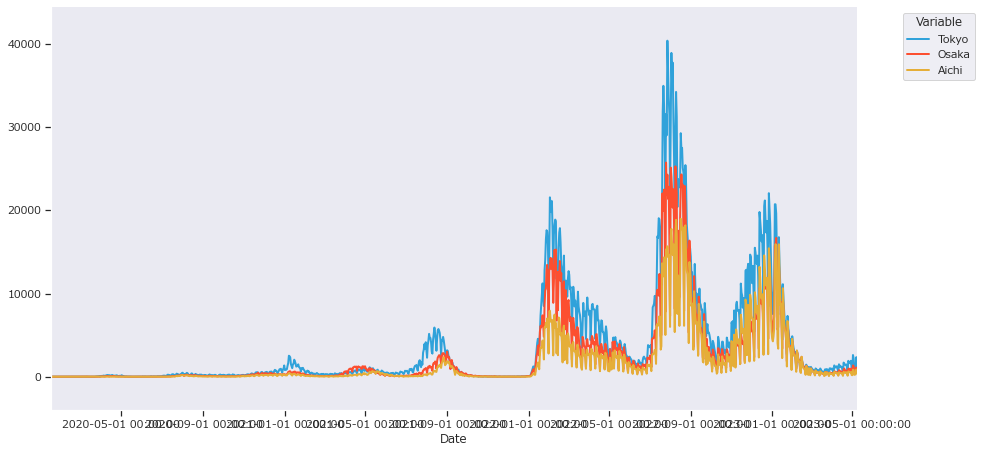

In [18]:
# import hvplot
import hvplot.polars
hvplot.extension('matplotlib') 
data_yoko.hvplot.line(x="Date",
                      y=["Tokyo", "Osaka", "Aichi"],
                      width=1200,
                      height=600,
                     )